# RISCO X RETORNO

## CÓDIGO FONTE

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf


# Importando dados
ativos = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 'LOGN3.SA', 'ITUB4.SA',
          'RADL3.SA', 'B3SA3.SA','BBAS3.SA','SMAL11.SA']

inicio = '2019-01-01'
fim = '2021-08-24'

precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

precos.head()

# Cálculo dos retornos
ativos_retornos = precos.pct_change()
ativos_retornos.head()
ativos_retornos = ativos_retornos.dropna()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_4200\3616101135.py:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ativos_retornos = precos.pct_change()


In [4]:
ativos_retornos.std()
volatilidade = pd.DataFrame(ativos_retornos.std(), columns= ['Vol'] )
retornos_medios = pd.DataFrame(ativos_retornos.mean(), columns= ['Returns'] )
risco_retorno = pd.concat([retornos_medios, volatilidade], axis = 1)
risco_retorno

,Returns,Vol
PETR4.SA,0.000904,0.032097
VALE3.SA,0.001575,0.028373
WEGE3.SA,0.002535,0.027109
LOGN3.SA,0.001774,0.040477
ITUB4.SA,0.000094,0.022976
RADL3.SA,0.001570,0.022215
B3SA3.SA,0.001110,0.027642
BBAS3.SA,-0.000100,0.028440
SMAL11.SA,0.000890,0.021723


## NORMALIZANDO PREÇOS

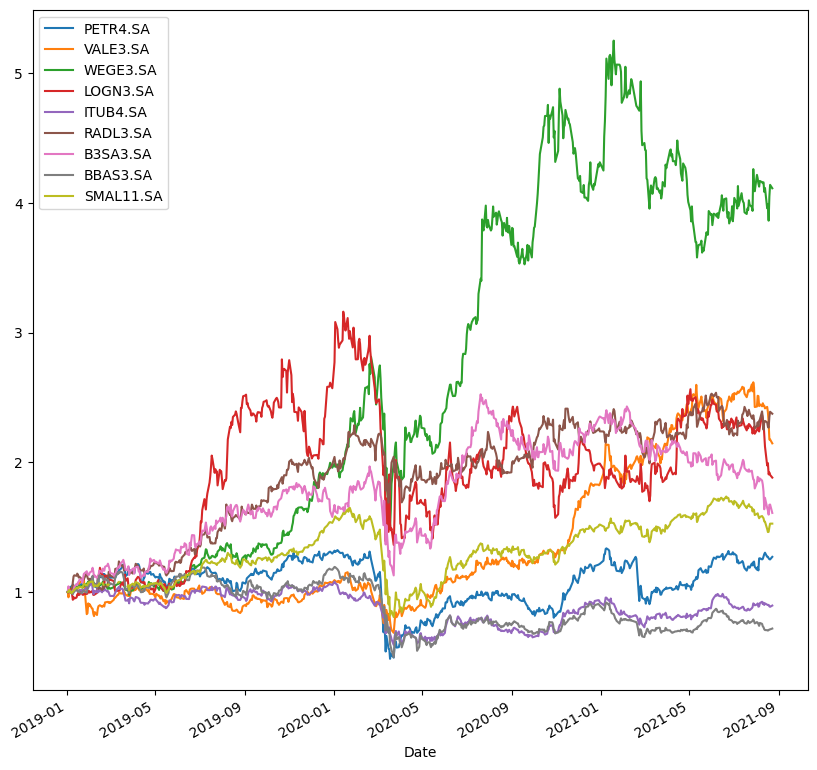

In [5]:
# Normalizando preços
normalizado = precos/precos.iloc[0]
normalizado.plot(figsize = (10,10));

## RETORNO X VOLATILIDADE

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_4200\1957744636.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x = risco_retorno.Vol[i], y = risco_retorno.Returns[i],


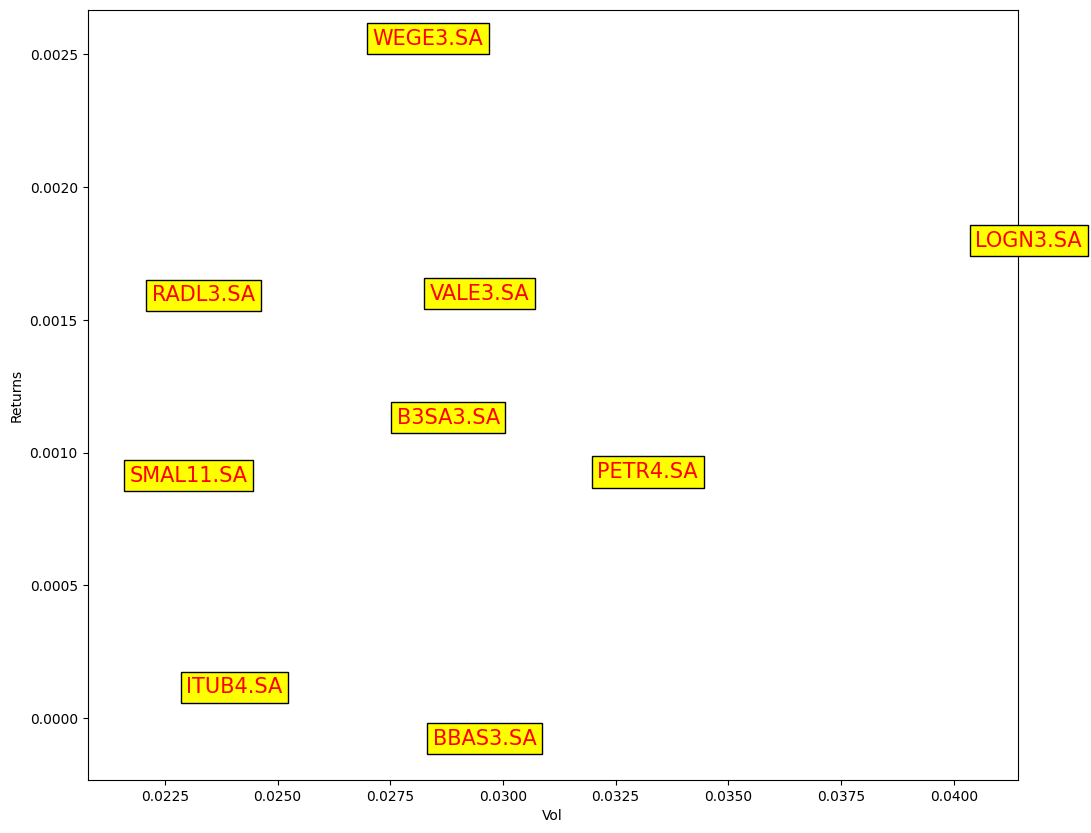

In [7]:
plt.subplots(figsize = (12,10))

sns.scatterplot(data = risco_retorno, x = 'Vol', y = 'Returns')

for i in range(risco_retorno.shape[0]):
  plt.text(x = risco_retorno.Vol[i], y = risco_retorno.Returns[i],
           s = risco_retorno.index[i],
           fontdict = dict(color = 'red', size = 15),
           bbox = dict(facecolor = 'yellow'))